<a href="https://colab.research.google.com/github/loveleen1saini/credit-card-fraud-detection/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

# Upload your Excel file (pick prediction_data.xlsx from your PC)
uploaded = files.upload()


Saving Data_Prediction.xlsx to Data_Prediction.xlsx


In [7]:
data = pd.read_excel(file_name, sheet_name="vw_joindata")
print(data.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   12490-TEL  Female   52      No       Telangana                    9   
2   16032-AND  Female   47      No  Andhra Pradesh                    8   
3   16068-BIH  Female   44     Yes           Bihar                    4   
4   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                 6        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                25     Deal 5            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001          0.00   
1     Mail

In [9]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
# Drop rows where the target is NaN
data = data.dropna(subset=['Customer_Status'])

# Redefine features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[347]]

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       347

    accuracy                           1.00       347
   macro avg       1.00      1.00      1.00       347
weighted avg       1.00      1.00      1.00       347



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))  # assuming 0 = No churn, 1 = Churn

print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=[0, 1]))


Confusion Matrix:
[[  0   0]
 [  0 347]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       347

    accuracy                           1.00       347
   macro avg       0.50      0.50      0.50       347
weighted avg       1.00      1.00      1.00       347



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

In [18]:
print("y_test value counts:")
print(y_test.value_counts())

print("y_pred value counts:")
print(pd.Series(y_pred).value_counts())


y_test value counts:
Customer_Status
1.0    347
Name: count, dtype: int64
y_pred value counts:
1.0    347
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

# Assuming X is your features and y is your target (Customer_Status)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


Confusion Matrix:
[[347]]

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       347

    accuracy                           1.00       347
   macro avg       1.00      1.00      1.00       347
weighted avg       1.00      1.00      1.00       347



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


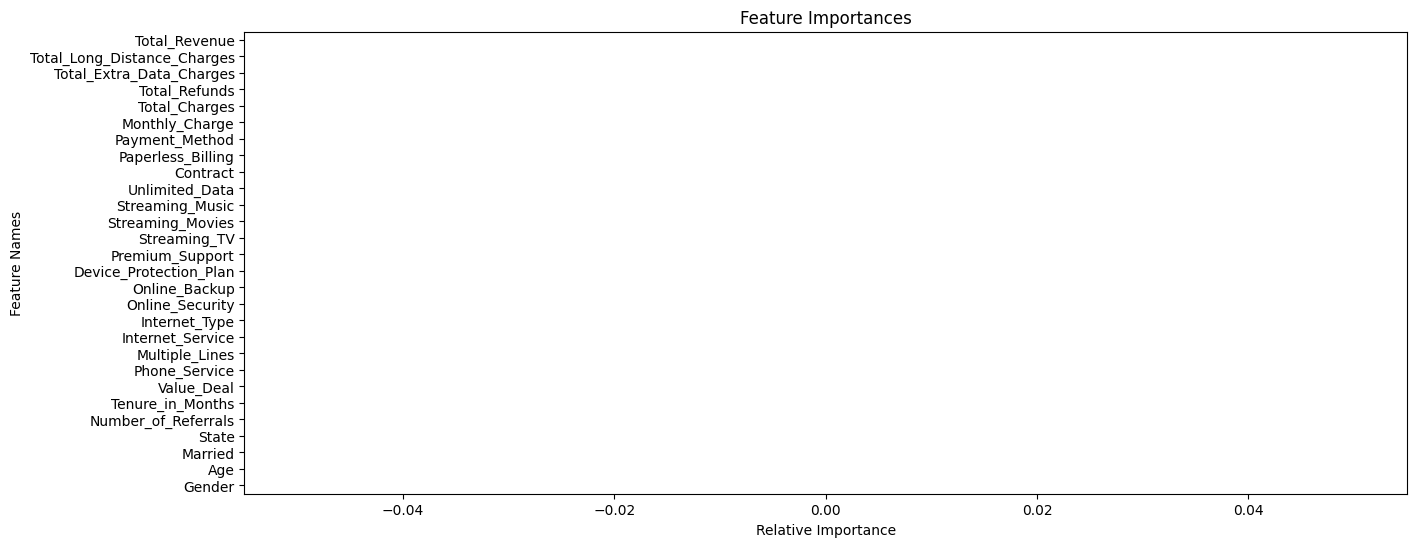

In [20]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [21]:
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))
print(classification_report(y_test, y_pred, labels=[0, 1], zero_division=0))


[[  0   0]
 [  0 347]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       347

    accuracy                           1.00       347
   macro avg       0.50      0.50      0.50       347
weighted avg       1.00      1.00      1.00       347



In [22]:
# Example defining X and y
X = data.drop('Customer_Status', axis=1)  # features
y = data['Customer_Status']                # target

# Split with stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
print(y.value_counts())


Customer_Status
1.0    1732
Name: count, dtype: int64


In [24]:
print(data['Customer_Status'].unique())


[1.]


In [26]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

Saving prediction_data.xlsx to prediction_data (4).xlsx


In [28]:
import pandas as pd

# Use the uploaded file
file_path = "prediction_data.xlsx"

# Load Excel file
xls = pd.ExcelFile(file_path)

# Print all sheet names
print(xls.sheet_names)


['vw_churnData', 'Sheet1']


In [30]:
import pandas as pd

# Use the uploaded file
file_path = "prediction_data.xlsx"  # Colab automatically saves the uploaded file with this name

# Read the sheet (removed leading space)
sheet_name = 'vw_churnData'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows
print(data.head())



  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11679-PUN  Female   38     Yes          Punjab                   13   
1   11713-MAD  Female   22     Yes  Madhya Pradesh                    4   
2   11751-UTT    Male   39      No   Uttar Pradesh                    4   
3   11799-TAM    Male   33      No      Tamil Nadu                    9   
4   11814-GUJ  Female   45     Yes         Gujarat                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                35     Deal 4           Yes            Yes  ...   
1                 5     Deal 5           Yes             No  ...   
2                23        NaN           Yes            Yes  ...   
3                20        NaN            No             No  ...   
4                 9        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      98.699997    973.250000           0.0   
1     Mail

In [31]:
import pandas as pd
from google.colab import files

# Upload the Excel file
uploaded = files.upload()  # This will prompt you to upload the file

# Use the uploaded file (replace 'Data_Prediction.xlsx' with your uploaded file name if different)
file_path = "Data_Prediction.xlsx"

# If the sheet name is 'vw_joindata', read it like this:
df = pd.read_excel(file_path, sheet_name='vw_joindata')

# Display the first few rows
print(df.head())


Saving prediction_data.xlsx to prediction_data (5).xlsx
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   12490-TEL  Female   52      No       Telangana                    9   
2   16032-AND  Female   47      No  Andhra Pradesh                    8   
3   16068-BIH  Female   44     Yes           Bihar                    4   
4   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                 6        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                25     Deal 5            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check 

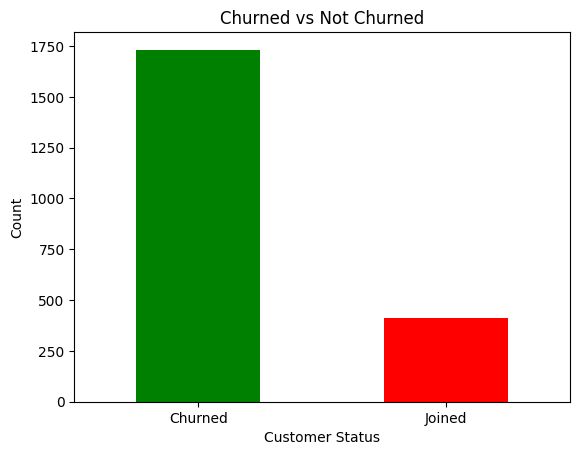

In [32]:
import matplotlib.pyplot as plt

# Count values
df['Customer_Status'].value_counts().plot(kind='bar', color=['green', 'red'])

# Labels and title
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Churned vs Not Churned')
plt.xticks(rotation=0)

# Show plot
plt.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 1. Upload and load the data
uploaded = files.upload()  # Upload your Excel file
file_path = "Data_Prediction.xlsx"  # Replace with uploaded file name if different
sheet_name = 'vw_joindata'

data = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. Drop unnecessary columns
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# 3. Label Encoding
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# 4. Encode the target column manually
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Check if both classes are present
print(data['Customer_Status'].value_counts())

# 5. Split features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Saving Data_Prediction.xlsx to Data_Prediction (1).xlsx
Customer_Status
1.0    1732
Name: count, dtype: int64


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the correct file with data
file_path = "Data_Prediction.xlsx"  # Ensure this is the correct file
sheet_name = 'vw_joindata'          # Correct sheet

data = pd.read_excel(file_path, sheet_name=sheet_name)

# Check if data is loaded
if data.empty:
    raise ValueError("The sheet 'vw_joindata' is empty. Please check the Excel file.")
else:
    print("Data loaded successfully. Shape:", data.shape)
    print(data.head())

# Drop columns not needed for prediction (if they exist)
drop_cols = ['Customer_ID', 'Churn_Category', 'Churn_Reason']
for col in drop_cols:
    if col in data.columns:
        data = data.drop(col, axis=1)

# Check for missing values in target
print("Missing values in Customer_Status before cleaning:", data['Customer_Status'].isna().sum())

# Keep only valid target values and convert to string
valid_targets = ['Stayed', 'Churned']
data = data[data['Customer_Status'].astype(str).str.strip().isin(valid_targets)]

# Encode target
data['Customer_Status'] = data['Customer_Status'].astype(str).str.strip().map({'Stayed': 0, 'Churned': 1})

# Verify no NaNs in target
print("Missing values in Customer_Status after cleaning:", data['Customer_Status'].isna().sum())

# Columns to encode (categorical)
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Label encoding
label_encoders = {}
for column in columns_to_encode:
    if column in data.columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Feature-target separation
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest trained successfully on 'vw_joindata'!")




Data loaded successfully. Shape: (2143, 32)
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   12490-TEL  Female   52      No       Telangana                    9   
2   16032-AND  Female   47      No  Andhra Pradesh                    8   
3   16068-BIH  Female   44     Yes           Bihar                    4   
4   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                 6        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                25     Deal 5            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.2999

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       347

    accuracy                           1.00       347
   macro avg       1.00      1.00      1.00       347
weighted avg       1.00      1.00      1.00       347



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


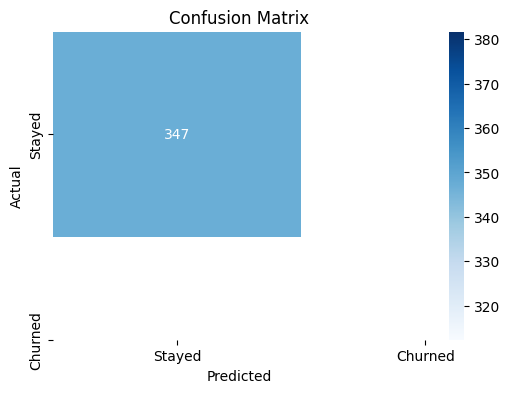

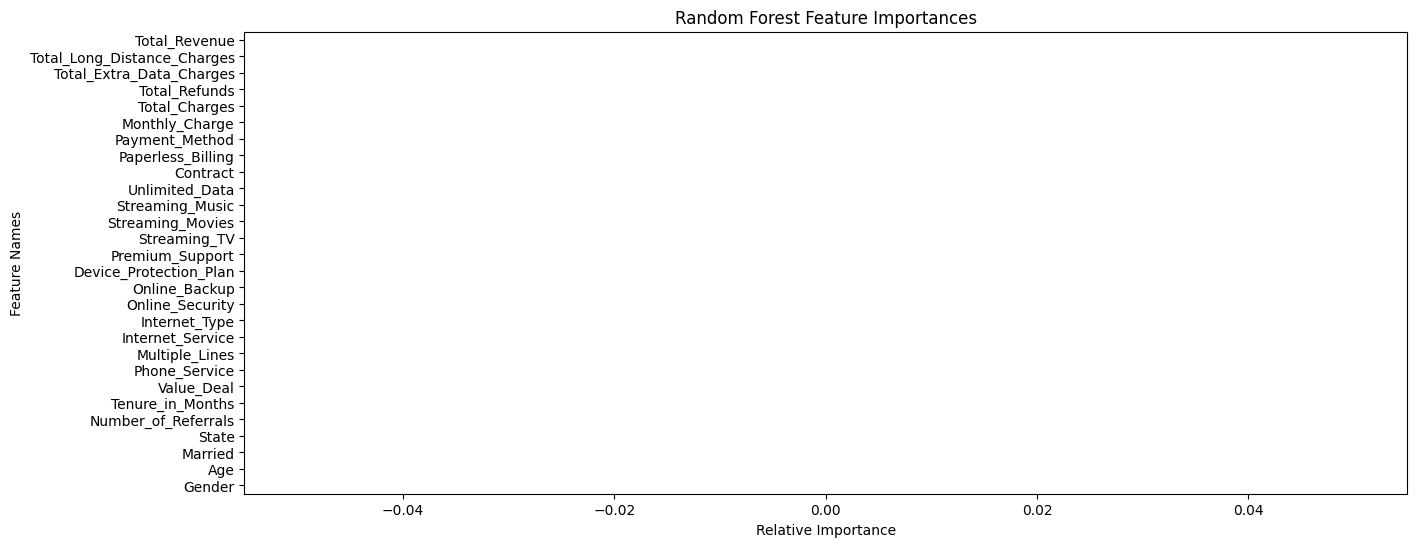

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Predictions on test set
y_pred = rf_model.predict(X_test)

# 2. Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 3. Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 5. Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Random Forest Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       347

    accuracy                           1.00       347
   macro avg       1.00      1.00      1.00       347
weighted avg       1.00      1.00      1.00       347



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


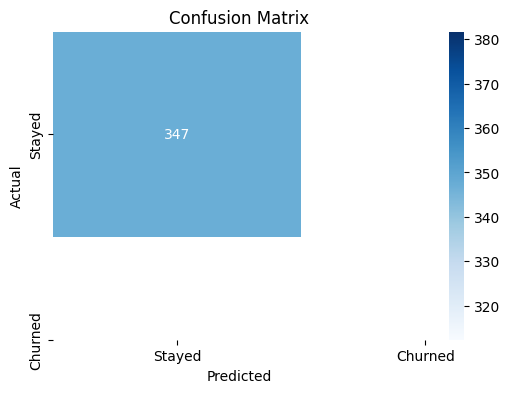

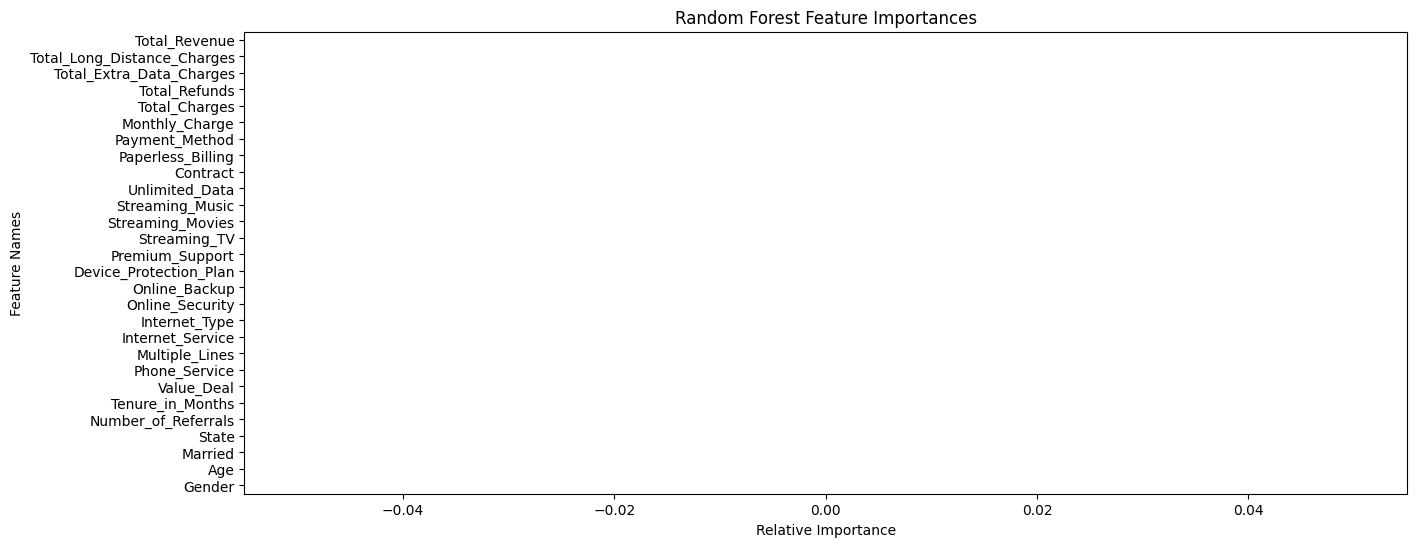

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 2️⃣ Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 3️⃣ Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4️⃣ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed','Churned'], yticklabels=['Stayed','Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 5️⃣ Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Random Forest Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [48]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1, errors='ignore')



In [49]:
# Display all column names in the DataFrame
print(data.columns.tolist())


['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status']


In [50]:
# Drop columns only if they exist (safe method)
columns_to_drop = ['Customer_ID', 'Churn_Category', 'Churn_Reason']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=columns_to_drop)


In [51]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Apply label encoding
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))


In [52]:
# Encode target variable
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [53]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
import pandas as pd

# Make sure you upload the correct file in Colab
file_path = "Data_Prediction.xlsx"  # or the file you uploaded

# List all sheet names to pick the right one
xls = pd.ExcelFile(file_path)
print("Sheets available:", xls.sheet_names)

# Load the sheet that has the actual data
data = pd.read_excel(file_path, sheet_name='Sheet1')  # replace with correct sheet name

# Check first rows and columns
print(data.head())
print(data.columns.tolist())
print("Number of rows:", len(data))



Sheets available: ['vw_joindata', 'Sheet1']
Empty DataFrame
Columns: []
Index: []
[]
Number of rows: 0


In [57]:
import pandas as pd

file_path = "Data_Prediction.xlsx"  # replace with your uploaded file
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)


Available sheets: ['vw_joindata', 'Sheet1']


In [58]:
data = pd.read_excel(file_path, sheet_name='vw_joindata')  # or whichever sheet has actual data
print(data.shape)          # should show non-zero rows
print(data.head())         # preview first rows


(2143, 32)
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   12490-TEL  Female   52      No       Telangana                    9   
2   16032-AND  Female   47      No  Andhra Pradesh                    8   
3   16068-BIH  Female   44     Yes           Bihar                    4   
4   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                 6        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                25     Deal 5            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001          0.00   

In [59]:
import pandas as pd

# Make sure the correct file is uploaded
file_path = "Data_Prediction.xlsx"  # your uploaded file

# List all sheets in the Excel file
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)

# Load the sheet that contains actual data (replace with correct sheet name)
data = pd.read_excel(file_path, sheet_name='vw_joindata')  # example sheet

# Check if data loaded correctly
print("Number of rows and columns:", data.shape)
print(data.head())
print(data.columns.tolist())


Available sheets: ['vw_joindata', 'Sheet1']
Number of rows and columns: (2143, 32)
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   12490-TEL  Female   52      No       Telangana                    9   
2   16032-AND  Female   47      No  Andhra Pradesh                    8   
3   16068-BIH  Female   44     Yes           Bihar                    4   
4   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                 6        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                25     Deal 5            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Ref

In [60]:
# Drop rows where target variable is NaN
data = data.dropna(subset=['Customer_Status'])

In [63]:
from sklearn.preprocessing import LabelEncoder

# Identify object-type columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Now split features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest trained successfully!")


Categorical columns to encode: ['Customer_ID', 'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Customer_Status', 'Churn_Category', 'Churn_Reason']
Random Forest trained successfully!


In [64]:
# Check data before handling NaNs
print("Data shape before dropna:", data.shape)
print("Number of NaNs in Customer_Status:", data['Customer_Status'].isna().sum())
print("Unique values in Customer_Status:", data['Customer_Status'].unique())


Data shape before dropna: (2143, 32)
Number of NaNs in Customer_Status: 0
Unique values in Customer_Status: [1 0]


In [65]:
data = pd.read_excel(file_path, sheet_name='vw_joindata')
print(data.shape)
print(data.head())


(2143, 32)
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   12490-TEL  Female   52      No       Telangana                    9   
2   16032-AND  Female   47      No  Andhra Pradesh                    8   
3   16068-BIH  Female   44     Yes           Bihar                    4   
4   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                 6        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                25     Deal 5            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001          0.00   

In [66]:
data['Customer_Status'] = data['Customer_Status'].map({'Joined': 0, 'Churned': 1})


In [67]:
print(data['Customer_Status'].value_counts(dropna=False))

Customer_Status
1    1732
0     411
Name: count, dtype: int64


Confusion Matrix:
[[ 45  37]
 [ 19 328]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62        82
           1       0.90      0.95      0.92       347

    accuracy                           0.87       429
   macro avg       0.80      0.75      0.77       429
weighted avg       0.86      0.87      0.86       429



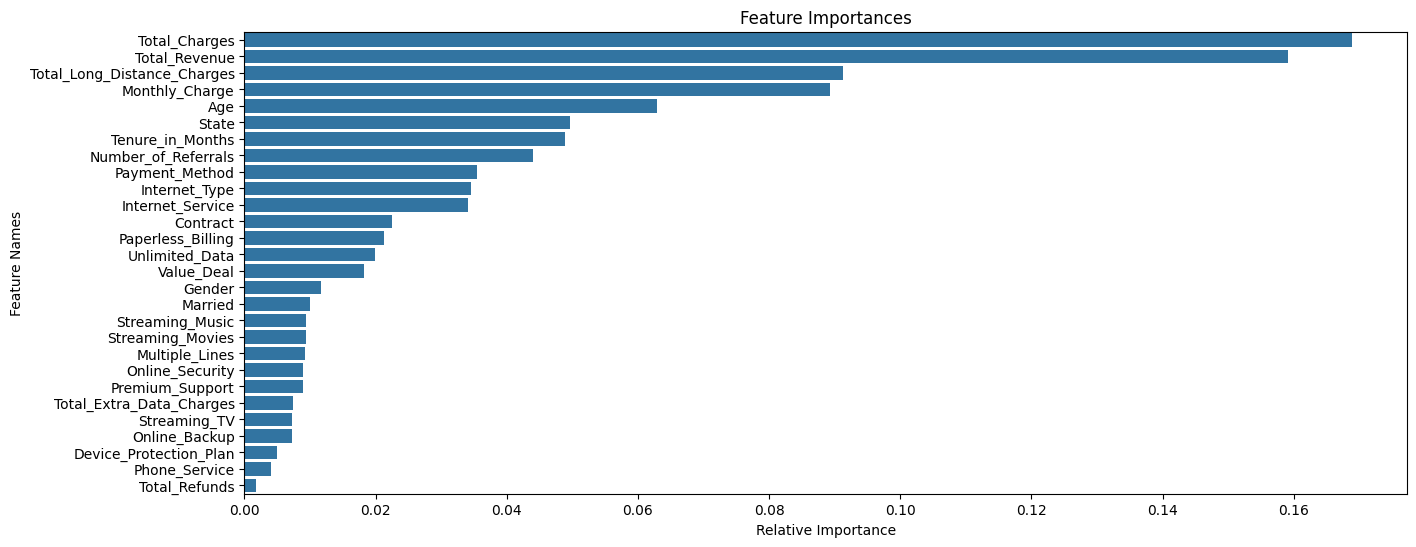

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop unnecessary columns if they exist
columns_to_drop = ['Customer_ID', 'Churn_Category', 'Churn_Reason']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=columns_to_drop)

# Encode all object/categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Feature-target split
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()



In [70]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Apply Label Encoding
label_encoders = {}
for col in columns_to_encode:
    if col in X.columns:  # ensure column exists
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # convert to string to avoid errors
        label_encoders[col] = le

print("Categorical columns encoded successfully!")


Categorical columns encoded successfully!


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Make sure X and y are defined and X categorical columns are already encoded
# X = data.drop('Customer_Status', axis=1)
# y = data['Customer_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest trained successfully in Colab!")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Random Forest trained successfully in Colab!
Training set size: 1714
Testing set size: 429


In [72]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [73]:
y_pred = rf_model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 46  36]
 [ 20 327]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        82
           1       0.90      0.94      0.92       347

    accuracy                           0.87       429
   macro avg       0.80      0.75      0.77       429
weighted avg       0.86      0.87      0.86       429



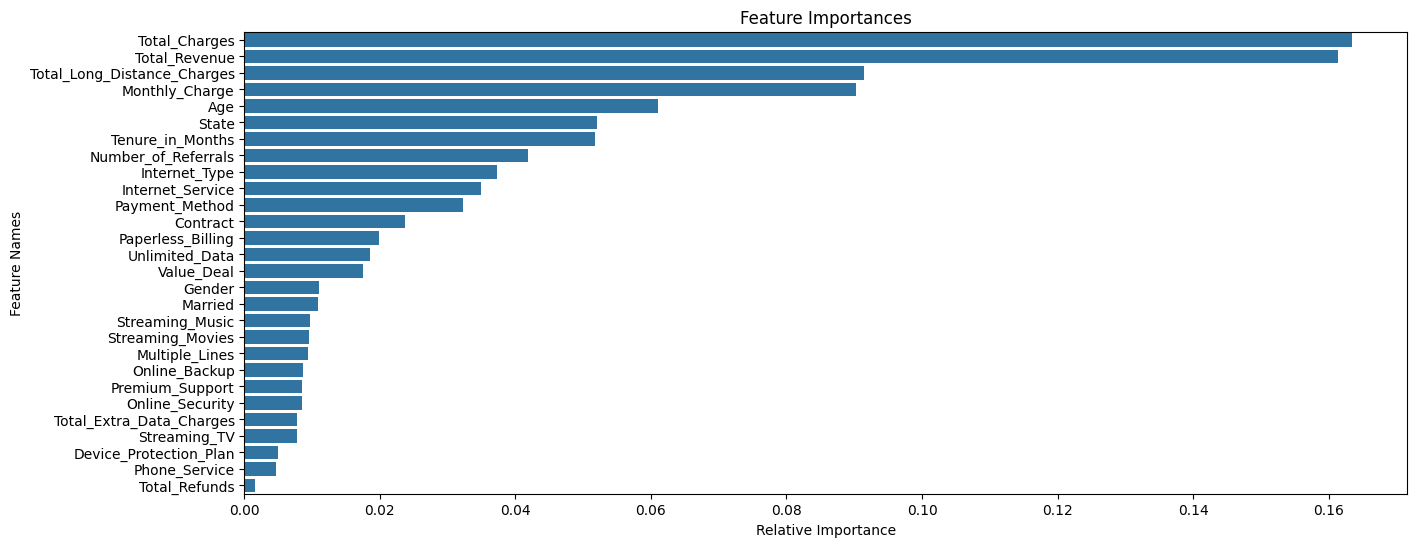

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

/tmp/ipython-input-3015806244.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Status', data=data, palette='pastel')


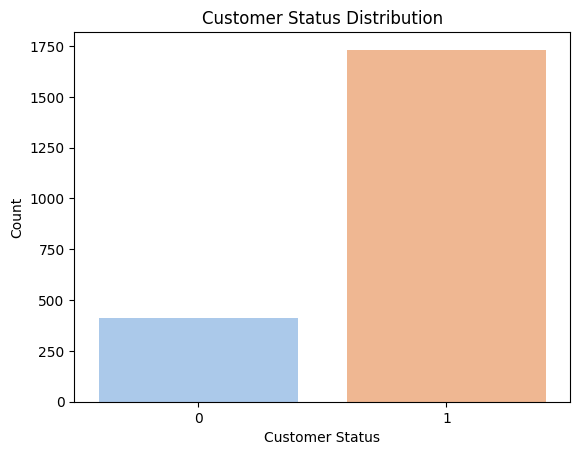

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Single color
sns.countplot(x='Customer_Status', data=data, color='skyblue')

# Multiple colors (if there are multiple categories)
sns.countplot(x='Customer_Status', data=data, palette='pastel')

plt.title('Customer Status Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

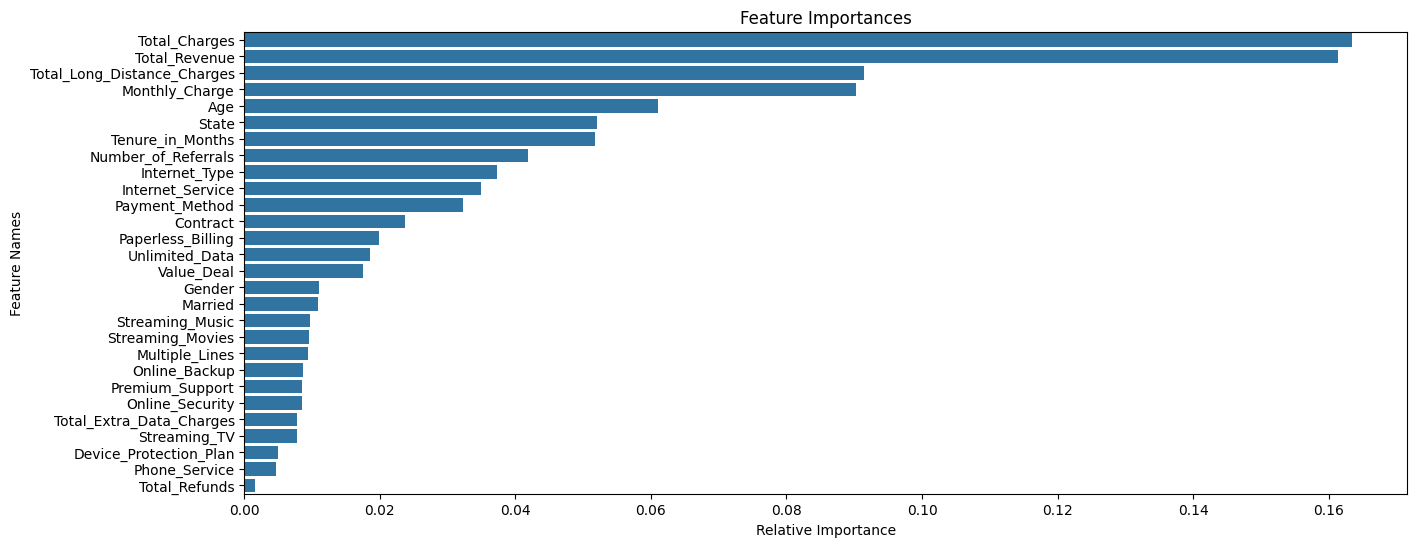

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

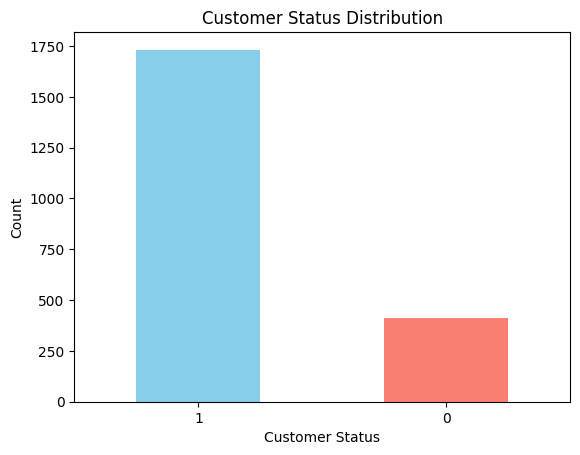

In [78]:
import matplotlib.pyplot as plt

counts = data['Customer_Status'].value_counts()
counts.plot(kind='bar', color=['skyblue', 'salmon'])  # customize colors here

plt.title('Customer Status Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

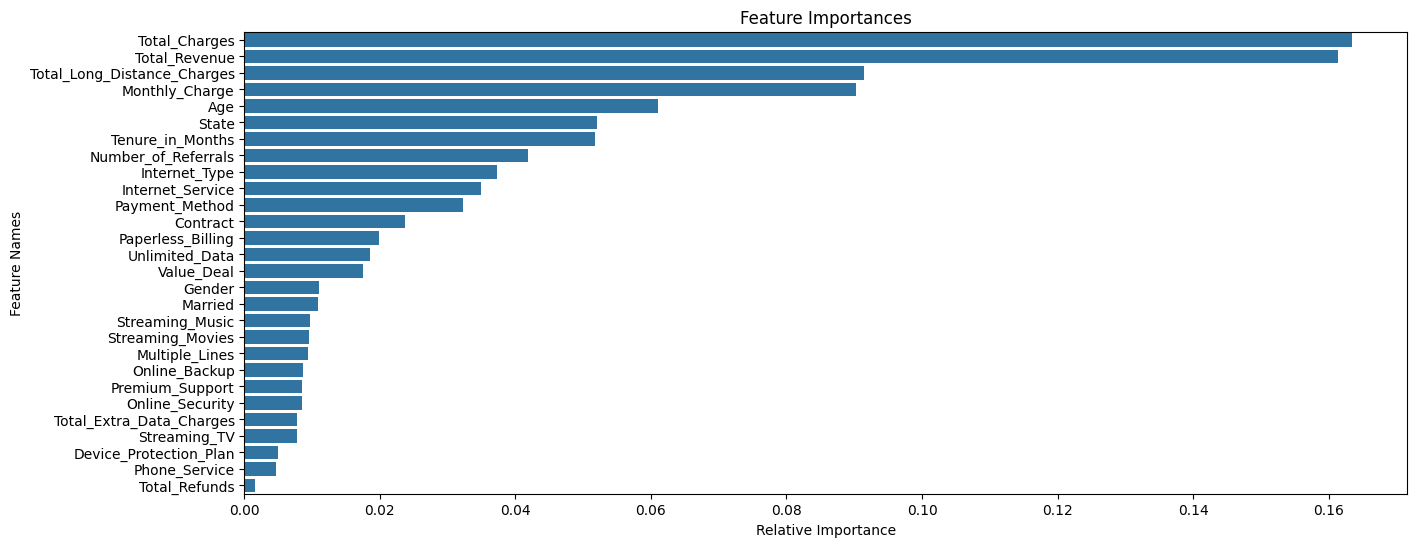

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

/tmp/ipython-input-1202952834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Status', data=data, palette='Set2')
/tmp/ipython-input-1202952834.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=data, palette='Set3')


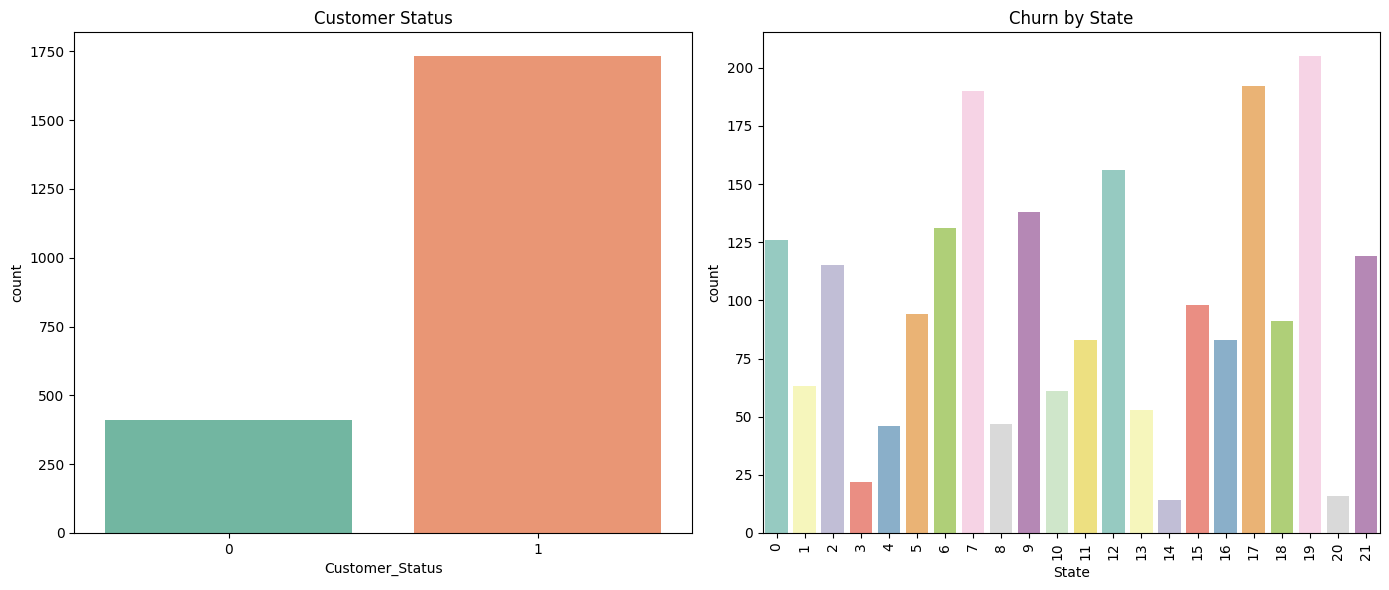

In [80]:
plt.figure(figsize=(14,6))

# Chart 1
plt.subplot(1,2,1)
sns.countplot(x='Customer_Status', data=data, palette='Set2')
plt.title('Customer Status')

# Chart 2
plt.subplot(1,2,2)
sns.countplot(x='State', data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('Churn by State')

plt.tight_layout()
plt.show()


<Axes: xlabel='Customer_Status', ylabel='count'>

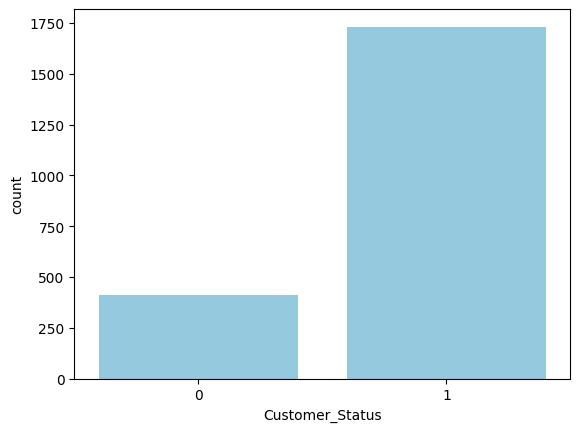

In [81]:
sns.countplot(x='Customer_Status', data=data, color='skyblue')


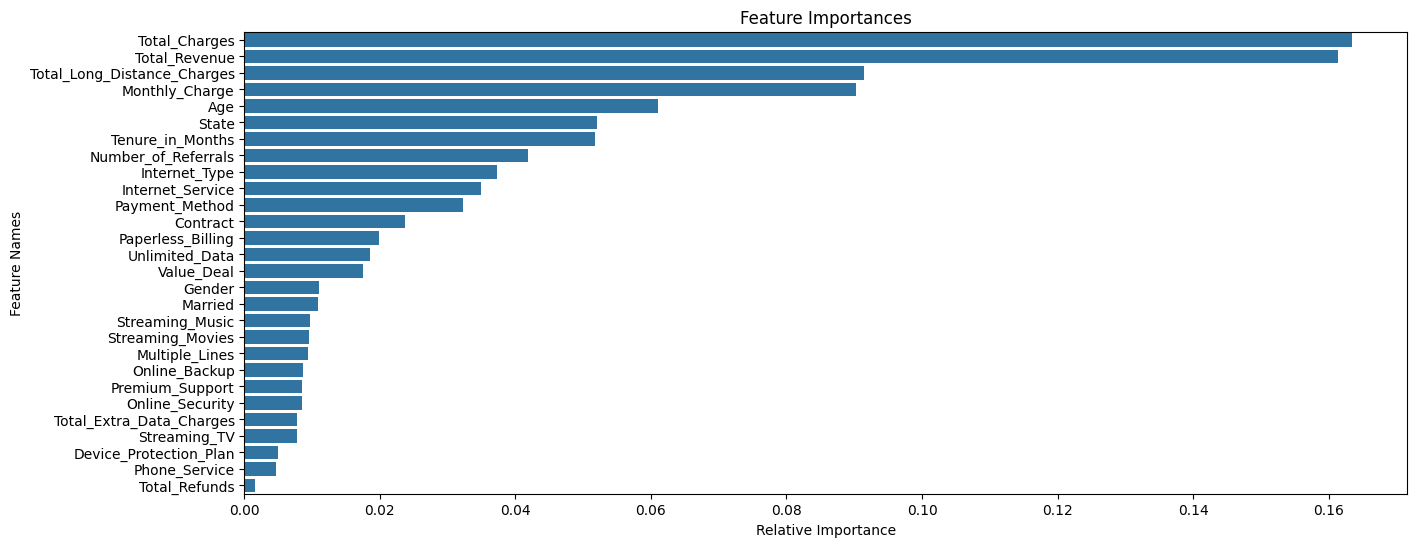

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [87]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1️⃣ Upload the Excel file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# 2️⃣ Specify the correct sheet name
sheet_name = 'vw_joindata'  # Use 'vw_churnData' based on your uploaded file

# 3️⃣ Read the data into a DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)
print("First few rows of uploaded data:")
print(new_data.head())

# 4️⃣ Preserve the original DataFrame
original_data = new_data.copy()

# 5️⃣ Retain Customer_ID
customer_ids = new_data['Customer_ID']

# 6️⃣ Drop columns not used for prediction
columns_to_drop = ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason']
columns_to_drop = [col for col in columns_to_drop if col in new_data.columns]
new_data = new_data.drop(columns=columns_to_drop)

# 7️⃣ Combine training data with new data for fitting label encoders
combined_data = pd.concat([X_train, new_data], ignore_index=True)

# 8️⃣ Encode categorical variables using existing label encoders
label_encoders = {}
for column in combined_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column].astype(str))
    label_encoders[column] = le

# Apply transformations to new_data using the fitted encoders
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column].astype(str))


# 9️⃣ Make predictions
new_predictions = rf_model.predict(new_data)

# 🔟 Add predictions to original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# 1️⃣1️⃣ Filter only predicted churned customers
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# 1️⃣2️⃣ Save the results
output_path = "/content/Prediction_Data_Predicted.xlsx"
churned_customers.to_excel(output_path, index=False)
print(f"Predicted churned customers saved to: {output_path}")

# 1️⃣3️⃣ Optional: Download the file to your local machine
files.download(output_path)

Saving Data_Prediction.xlsx to Data_Prediction (4).xlsx
First few rows of uploaded data:
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   12490-TEL  Female   52      No       Telangana                    9   
2   16032-AND  Female   47      No  Andhra Pradesh                    8   
3   16068-BIH  Female   44     Yes           Bihar                    4   
4   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                 6        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                25     Deal 5            No             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Tot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>